### Importar bibliotecas

In [86]:
import pandas as pd
import numpy as np
from src.Particle import ParticleType
from src.JetBuilder import JetBuilder
from src.JetImage import JetImage, JetImageCalculator, JetImageCalculatorPandas, JetImageAvarageCalculator
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split

### Leitura de dados

In [2]:
data_gluon = pd.read_csv('../Dados/g_jets.csv', header=None, sep=' ')
data_quark = pd.read_csv('../Dados/q_jets.csv', header=None, sep=' ')
data_top = pd.read_csv('../Dados/t_jets.csv', header=None, sep=' ')

### Construção de jatos

- Tempo para carregar todos os dados: 38m 3.6s
- Tempo para carregar 500 jatos por partícula: 13.9s

In [49]:
# creating the list with the jets objects
jet_builder = JetBuilder()
# For the data exploration this amount of jets is enough
# More than that the evaluation stars to become really slower
gluon_jets = jet_builder.create_jets(data_frame=data_gluon[:500], jet_type=ParticleType.Gluon)
quark_jets = jet_builder.create_jets(data_frame=data_quark[:500], jet_type=ParticleType.LightQuark)
top_jets = jet_builder.create_jets(data_frame=data_top[:500], jet_type=ParticleType.Top)

#### Geração de imagens

In [50]:
jet_image = JetImage((-0.3, 0.3), (-0.3, 0.3), 9, 9, JetImageCalculator())

In [51]:
first_gluon_image = jet_image.create_jet_image(gluon_jets[10])

In [52]:
# Create a custom colormap that transitions from white to blue to red
colors = [(1, 1, 1), (0, 0, 1), (1, 0, 0)]  # White, Blue, Red
n_bins = 100  # Number of bins for interpolation
custom_cmap = LinearSegmentedColormap.from_list('white_blue_red', colors, N=n_bins)

Text(0, 0.5, '$\\eta^{rel}$')

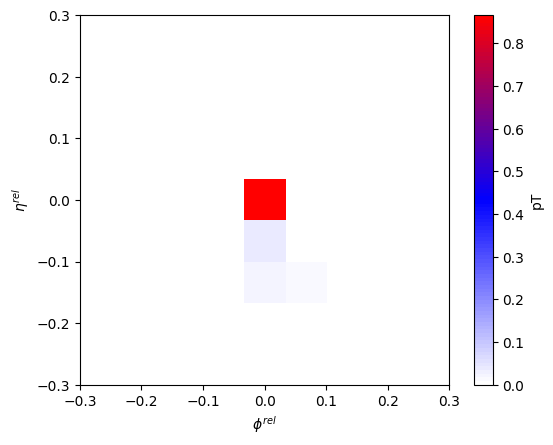

In [53]:
# import numpy as np
plt.imshow(first_gluon_image, cmap=custom_cmap, extent=(-0.3, 0.3, -0.3, 0.3))
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

In [54]:
len(gluon_jets)

500

### Organização dos dados como o MNIST

In [94]:
#Cria um array pra cada jato e associa a ele se ele é um g, t ou q
t_tam = len(top_jets)
q_tam = len(quark_jets)
g_tam = len(gluon_jets)
tam_particulas = t_tam + q_tam + g_tam

dados_particulas = np.empty((tam_particulas,81))
label = np.zeros((t_tam+q_tam+g_tam,3))

for i in range(t_tam):

    top_image = jet_image.create_jet_image(top_jets[i])
    top_image = top_image.reshape(1,81)

    label[i,0] = 1.0
    dados_particulas[i] = top_image

for i in range(q_tam):

    quark_image = jet_image.create_jet_image(quark_jets[i])
    quark_image = quark_image.reshape(1,81)

    label[i+t_tam,1] = 1.0
    dados_particulas[i+t_tam] = quark_image

for i in range(g_tam):

    gluon_image = jet_image.create_jet_image(gluon_jets[i])
    gluon_image = gluon_image.reshape(1,81)

    label[i+t_tam+q_tam,2] = 1.0
    dados_particulas[i+t_tam+q_tam] = gluon_image

dados = (dados_particulas,label)
dados

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]))

### Particionamento dos dados

In [122]:
X, Y = dados[0].copy(), dados[1].copy()

x, x_test, y, y_test = train_test_split(X, Y, train_size = 0.7, shuffle= True)
vx, tx, vy, ty = train_test_split(x_test, y_test, train_size = 0.5, shuffle= True)

x = x.reshape(-1,9,9,1)
vx = vx.reshape(-1,9,9,1)
tx = tx.reshape(-1,9,9,1)
